<a href="https://colab.research.google.com/github/palharez/lcsc/blob/master/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
notas = pd.read_csv('ratings.csv')
notas.head() # Exiber os 5 primeiros elementos

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando as notas em geral

In [31]:
notas.shape # (Quantidade linhas, Quantidade campos)

(100836, 4)

In [0]:
notas.columns = ['usarioId', 'filmeId', 'nota', 'momento'] # Altera os nomes das colunas

In [33]:
notas.head() # Pandas data frame

,usarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [34]:
notas['nota'] # Pandas series

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [35]:
notas['nota'].unique() # Devolver os valores únicos dessa series

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [36]:
notas['nota'].value_counts() # Exibe quantas vezes cada nota aparece e ordenou

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [37]:
notas['nota'].mean() # Média de uma series

3.501556983616962

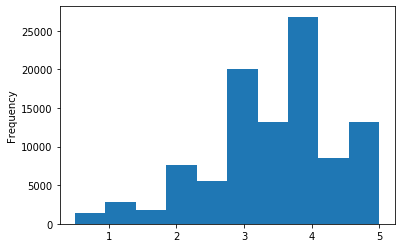

In [38]:
# O processo de exibir algo na tela se chama plotar!
notas.nota.plot(kind='hist') # kind=hist é um Histograma

In [39]:
notas.nota.median() # A mediana quem divide o conjunto de dados no meio

3.5

In [40]:
notas.nota.describe() # Retorna algumas medidas de descrição dos dados

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [0]:
import seaborn as sns # Lib de visualização de dados!

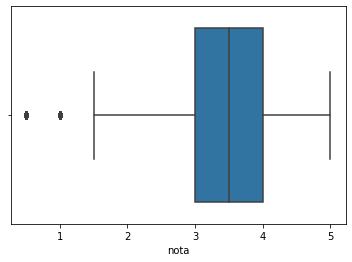

In [42]:
sns.boxplot(notas.nota)

# Olhando os filmes

In [43]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [44]:
notas.head()

,usarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931



# Analisando algumas notas especificas por filmes

In [45]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [46]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [47]:
medias_por_filme = notas.groupby('filmeId').mean().nota
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

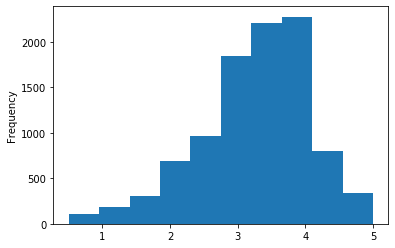

In [48]:
medias_por_filme.plot(kind='hist')

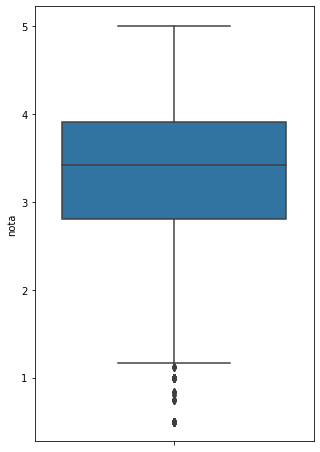

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8)) # Alterar o tamanho do gráfico
sns.boxplot(y=medias_por_filme) # Alterar o eixo de visualização dos dados

In [50]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

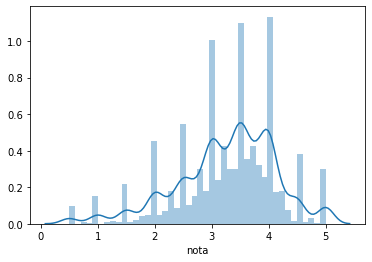

In [51]:
sns.distplot(medias_por_filme) # bins = quantidade de caixas de separação

Text(0.5, 1.0, 'Histograma das médias do filmes')

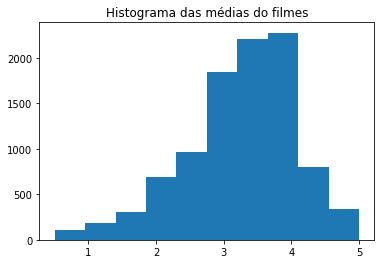

In [52]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title('Histograma das médias do filmes')

In [53]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [54]:
"""
Categorica nominal
"""
tmdb.original_language.unique() # Um tipo de variável categorica onde não tem uma ordem de grandeza

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [0]:
# Exemplo de ordem de grandeza - Categorica ordinal
# primeiro grau
# segun grau
# terceiro grau
# 1 grau < 2 grau < 3 grau

In [0]:
# budget => quantitativo continuo
# votecount => quantitativo => 1, 2, 3, 4, não tem 2.5 votos
# notas do movilens => 0.5, 1, 1.5, ..., 5 não tem 2.7

In [57]:
tmdb.original_language.value_counts().index


Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ta', 'cs', 'ar', 'ro', 'id', 'tr',
       'pl', 'vi', 'is', 'af', 'ky', 'hu', 'el', 'te', 'sl', 'xx', 'nb', 'ps',
       'no'],
      dtype='object')

In [58]:
tmdb.original_language.value_counts().values


array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [59]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index() # Uma unica serie de dados
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


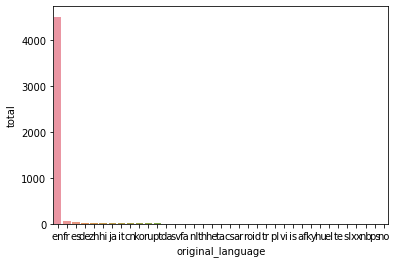

In [60]:
sns.barplot(x="original_language", y="total", data=contagem_de_lingua)

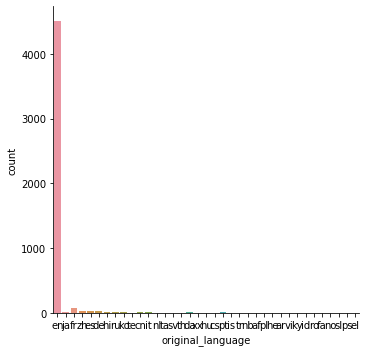

In [61]:
sns.catplot(x='original_language', kind="count", data=tmdb)

In [68]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles

print(total_de_ingles, total_do_resto)

4505 298


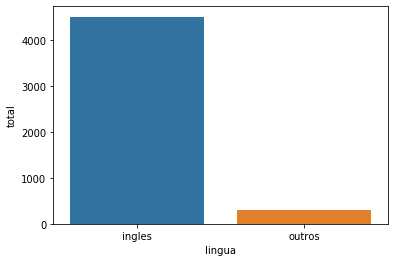

In [74]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_do_resto]
}

dados = pd.DataFrame(dados)
sns.barplot(data=dados, x='lingua', y='total')

In [81]:
total_por_lingua_de_outros_filmes = tmdb.query('original_language !=  "en"').original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
ro     2
id     2
ta     2
cs     2
ar     2
sl     1
ky     1
nb     1
pl     1
af     1
te     1
xx     1
no     1
vi     1
ps     1
tr     1
is     1
hu     1
el     1
Name: original_language, dtype: int64

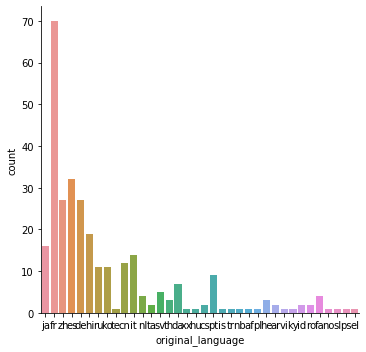

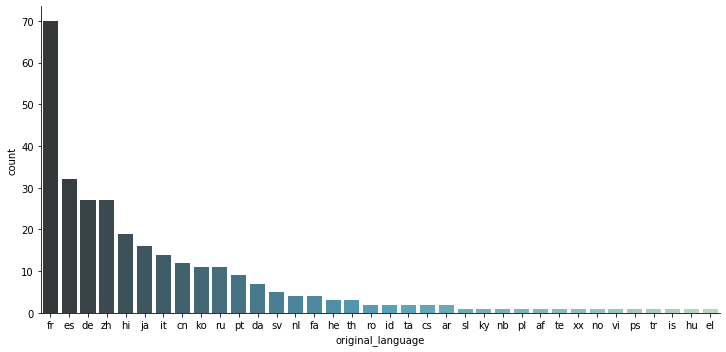

In [89]:
filmes_sem_lingua_original_em_ingles = tmdb.query('original_language != "en"')

sns.catplot(
    x='original_language', 
    kind="count", 
    data=filmes_sem_lingua_original_em_ingles
)

sns.catplot(
    x='original_language', 
    kind="count", 
    data=filmes_sem_lingua_original_em_ingles, 
    aspect=2, 
    order=total_por_lingua_de_outros_filmes.index,
    palette='GnBu_d'
)

# Revisão

In [91]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [94]:
notas_do_toy_story = notas.query('filmeId==1')
notas_do_jumanji = notas.query('filmeId==2')
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [96]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.mean())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.mean())

Nota média do Toy Story 3.92
Nota média do Jumanji 3.43


In [97]:
print("Nota média do Toy Story %.2f" % notas_do_toy_story.nota.median())
print("Nota média do Jumanji %.2f" % notas_do_jumanji.nota.median())

Nota média do Toy Story 4.00
Nota média do Jumanji 3.50


In [0]:
import numpy as np
filme1 = np.append( np.array([2.5] * 10), np.array([3.5] * 10) )
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [126]:
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))
print(np.std(filme1), np.std(filme2))

3.0 3.0
3.0 3.0
0.5 2.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

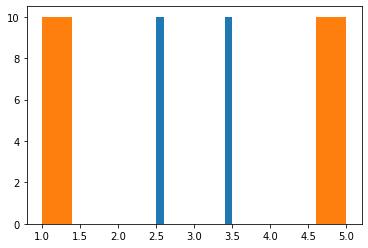

In [115]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7f162e7ab278>,
 'caps': [<matplotlib.lines.Line2D at 0x7f162e7abc18>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f162e7b6630>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f162e7b62e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f162e7ab588>,
  <matplotlib.lines.Line2D at 0x7f162e7c4048>]}

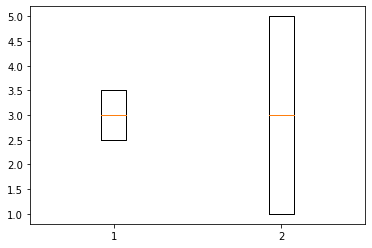

In [118]:
plt.boxplot([filme1, filme2])

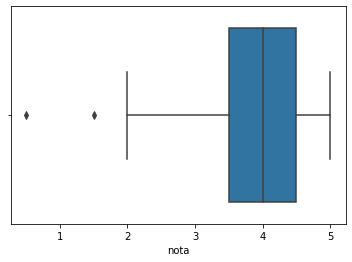

In [119]:
sns.boxplot(notas_do_toy_story.nota)

{'boxes': [<matplotlib.lines.Line2D at 0x7f162ecdda58>,
 'caps': [<matplotlib.lines.Line2D at 0x7f162ed23470>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f162ed23c88>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f162ed23b00>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f162ecddd30>,
  <matplotlib.lines.Line2D at 0x7f162ec03860>]}

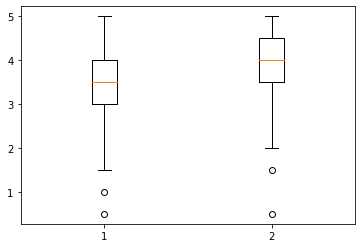

In [121]:
plt.boxplot([notas_do_jumanji.nota, notas_do_toy_story.nota])

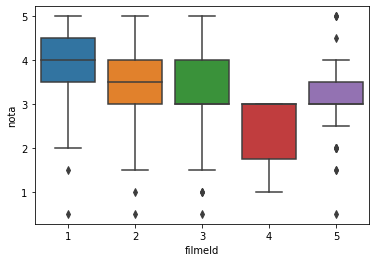

In [123]:
sns.boxplot(x='filmeId', y='nota', data=notas.query('filmeId in [1,2,3,4,5]'))

In [125]:
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114045 0.8817134921476455
